# Anticipez les besoins en consommations de bâtiments

## Prérequis

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


## Partie 1 Analyse exploratoire

## Résultat attendu  

### Le notebook template avec la partie "Analyse exploratoire” complétée.

#### Import des datas

In [63]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

#### Visualisation des datas

In [64]:
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

#### Informations

In [65]:
display(building_consumption.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

None

On supprime les colonnes inutiles

In [66]:
print("Valeurs uniques dans DataYear :", building_consumption["DataYear"].unique())
building_consumption = building_consumption.drop(columns=["DataYear"])


Valeurs uniques dans DataYear : [2016]


In [67]:
building_consumption = building_consumption.drop(columns=["City","State"])

Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas

In [68]:
print("\nProportion de valeurs manquantes par colonne (%):")
print(((len(building_consumption) - building_consumption.apply(lambda s: s.value_counts().sum())) / len(building_consumption) * 100).sort_values(ascending=False))


Proportion de valeurs manquantes par colonne (%):
Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseTypeGFA     50.266588
SecondLargestPropertyUseType        50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
ZipCode                              0.473934
SteamUse(kBtu)                       0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
Electricity(kBtu)                    0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     0.266588
TotalGHGEmissions                    0.266588
Electricity(kWh)                     0.266588
GHGEmissionsIntensity                0.266588
ListOfAllPropertyUseTypes    

#### Supprimer les non residentiels

In [69]:
print(sorted(building_consumption["PrimaryPropertyType"].dropna().unique()))

['Distribution Center', 'High-Rise Multifamily', 'Hospital', 'Hotel', 'K-12 School', 'Laboratory', 'Large Office', 'Low-Rise Multifamily', 'Medical Office', 'Mid-Rise Multifamily', 'Mixed Use Property', 'Office', 'Other', 'Refrigerated Warehouse', 'Residence Hall', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Senior Care Community', 'Small- and Mid-Sized Office', 'Supermarket / Grocery Store', 'University', 'Warehouse', 'Worship Facility']


In [70]:
# Liste des types purement résidentiels à exclure
types_residentiels = [
    "High-Rise Multifamily",
    "Mid-Rise Multifamily",
    "Low-Rise Multifamily",
    "Residence Hall",
    "Senior Care Community"
]

# Suppression des lignes correspondantes
idx_res = building_consumption.index[building_consumption["PrimaryPropertyType"].isin(types_residentiels)]
building_consumption = building_consumption.drop(index=idx_res)

# Contrôle
print("Lignes restantes :", len(building_consumption))
print("Types restants :", building_consumption["PrimaryPropertyType"].value_counts().head(10))


Lignes restantes : 1652
Types restants : PrimaryPropertyType
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Name: count, dtype: int64


#### Suppresion des lignes considérées comme outliers

In [71]:
# Comptage avant
n_avant = len(building_consumption)

# Index des outliers marqués
idx_outliers = building_consumption.index[
    building_consumption["Outlier"].astype(str).str.contains("high outlier|low outlier", case=False, na=False)
]

# Option audit, conserver les lignes supprimées
df_outliers = building_consumption.loc[idx_outliers].copy()

# Suppression
building_consumption = building_consumption.drop(index=idx_outliers)

# Contrôle
print("Outliers supprimés :", len(idx_outliers), "; lignes restantes :", len(building_consumption), "; lignes avant :", n_avant)


Outliers supprimés : 16 ; lignes restantes : 1636 ; lignes avant : 1652


In [72]:
to_drop = (building_consumption.isnull().mean() * 100 > 80).index[building_consumption.isnull().mean() * 100 > 80]
building_consumption = building_consumption.drop(columns=to_drop)
display(building_consumption.head())

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [73]:
print("Colonnes supprimées car > 80 % de NaN :", to_drop)

Colonnes supprimées car > 80 % de NaN : Index(['YearsENERGYSTARCertified', 'Comments', 'Outlier'], dtype='object')


#### Suppression des colonnes avec des données non structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)

In [74]:
building_consumption.drop(columns=[
    'ENERGYSTARScore', 'ComplianceStatus', 
    'DefaultData', 'OSEBuildingID', 'PropertyName', 'TaxParcelIdentificationNumber', 
    'SteamUse(kBtu)', 'Electricity(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 
    'NaturalGas(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 
    'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
    'GHGEmissionsIntensity'
], inplace=True)


#### Préparation à une matrice de corrélation

In [75]:
building_consumption["CouncilDistrictCode"] = building_consumption["CouncilDistrictCode"].astype("string")
building_consumption["ZipCode"] = building_consumption["ZipCode"].astype("Int64").astype("string")


In [76]:
colonnes_autorisees = [
    "YearBuilt",
    "NumberofBuildings", "NumberofFloors",
    "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kWh)", "Electricity(kBtu)",
    "NaturalGas(therms)", "NaturalGas(kBtu)",
    "TotalGHGEmissions", "GHGEmissionsIntensity"
]

cols = [c for c in colonnes_autorisees if c in building_consumption.columns]
cols = [c for c in cols if building_consumption[c].dtype.kind in "if" and building_consumption[c].nunique(dropna=True) > 1]
corr = building_consumption[cols].corr(method="pearson").round(2)
print("Colonnes utilisées pour la corrélation :", cols)
display(corr)


Colonnes utilisées pour la corrélation : ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'TotalGHGEmissions']


,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions
YearBuilt,1.00,-0.03,0.10,0.10,0.28,0.07,0.07,0.26,0.16,0.05
NumberofBuildings,-0.03,1.00,-0.02,0.73,-0.01,0.77,0.80,0.15,0.00,0.42
NumberofFloors,0.10,-0.02,1.00,0.41,0.51,0.35,0.33,0.49,0.25,0.13
PropertyGFATotal,0.10,0.73,0.41,1.00,0.38,0.99,0.98,0.80,0.52,0.52
PropertyGFAParking,0.28,-0.01,0.51,0.38,1.00,0.25,0.28,0.46,0.18,0.06
PropertyGFABuilding(s),0.07,0.77,0.35,0.99,0.25,1.00,0.98,0.79,0.55,0.54
LargestPropertyUseTypeGFA,0.07,0.80,0.33,0.98,0.28,0.98,1.00,0.76,0.46,0.57
SecondLargestPropertyUseTypeGFA,0.26,0.15,0.49,0.80,0.46,0.79,0.76,1.00,0.68,0.51
ThirdLargestPropertyUseTypeGFA,0.16,0.00,0.25,0.52,0.18,0.55,0.46,0.68,1.00,0.68
TotalGHGEmissions,0.05,0.42,0.13,0.52,0.06,0.54,0.57,0.51,0.68,1.00


 * Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 


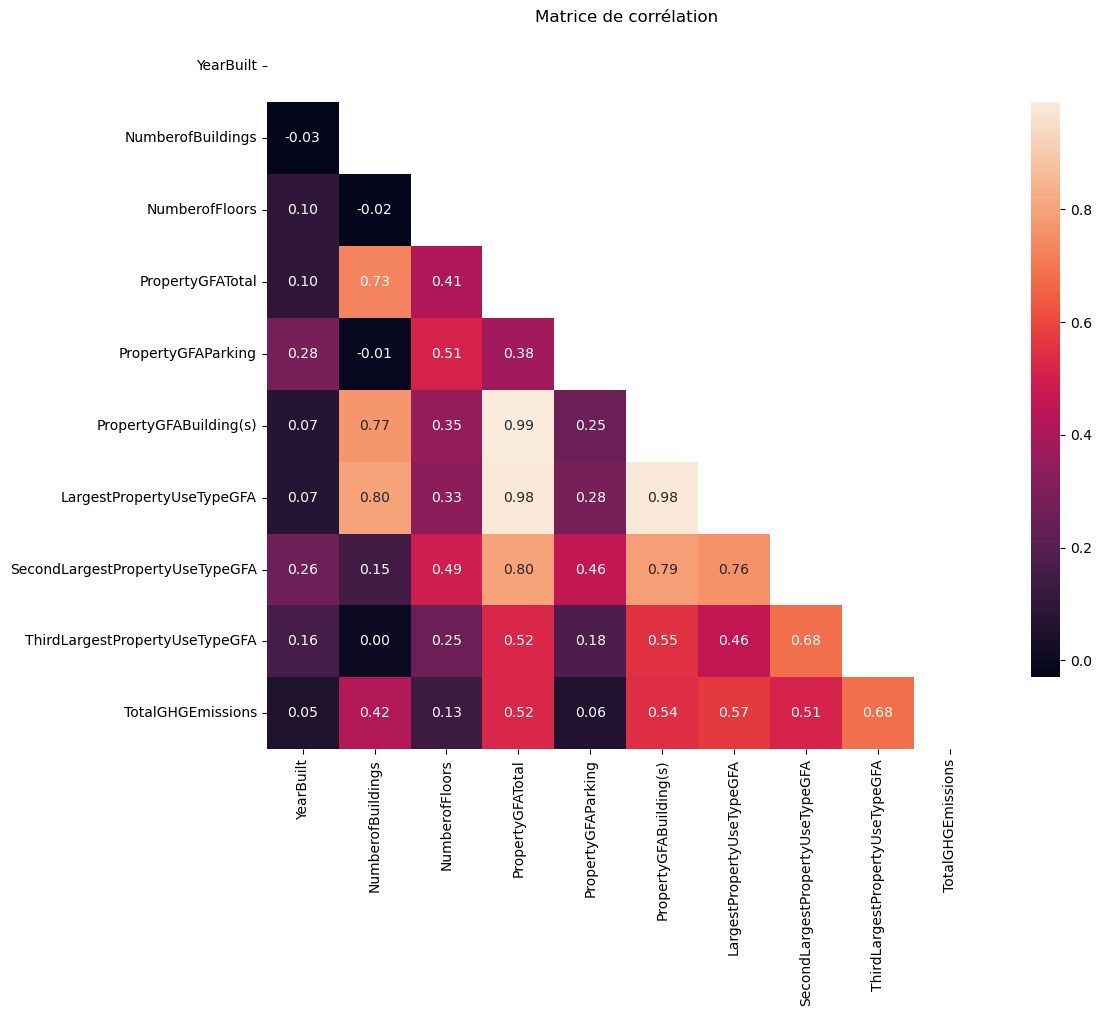

In [77]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

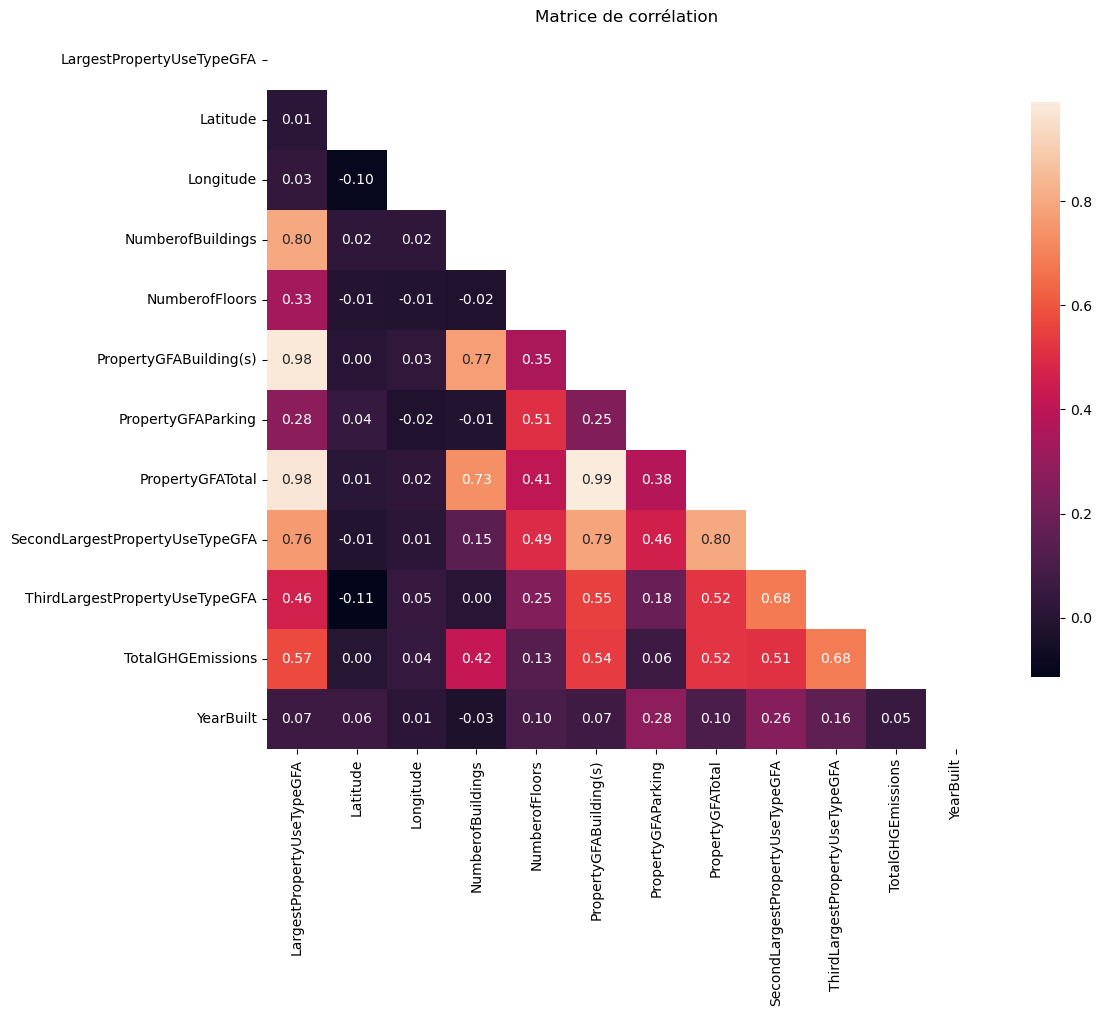

In [78]:
# Colonnes numériques pertinentes
cols_num = building_consumption.select_dtypes(include="number").columns.difference(
    ["OSEBuildingID", "ZipCode", "CouncilDistrictCode"]
)
cols_num = [c for c in cols_num if building_consumption[c].nunique(dropna=True) > 1]

# Matrice et heatmap
corr = building_consumption[cols_num].corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


Il en reste des corrélés mais ils restent tout de même interessants

### On continue le nettoyage et description

In [79]:
colonnes_a_decrire = [
    "YearBuilt",
    "NumberofBuildings", "NumberofFloors",
    "PropertyGFATotal", "PropertyGFABuilding(s)", "PropertyGFAParking",
    "ENERGYSTARScore",
    "TotalGHGEmissions"
]

colonnes_a_decrire = [c for c in colonnes_a_decrire if c in building_consumption.columns]

table_statistiques = building_consumption[colonnes_a_decrire].describe(
    percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
).T
table_statistiques["taux_manquants_%"] = building_consumption[colonnes_a_decrire].isna().mean().mul(100).round(1)
table_statistiques


,count,mean,std,min,10%,25%,50%,75%,90%,max,taux_manquants_%
YearBuilt,1636.0,1962.248778,32.776938,1900.0,1912.000,1930.000,1966.000,1990.000,2004.000,2015.00,0.0
NumberofBuildings,1634.0,1.171359,2.959206,0.0,1.000,1.000,1.000,1.000,1.000,111.00,0.1
NumberofFloors,1636.0,4.162592,6.635589,0.0,1.000,1.000,2.000,4.000,7.000,99.00,0.0
PropertyGFATotal,1636.0,120162.189487,300153.958991,11285.0,23036.000,29634.750,49289.500,106889.000,274849.000,9320156.00,0.0
PropertyGFABuilding(s),1636.0,106970.861247,286711.086703,10925.0,22515.500,28542.250,47316.500,95444.750,215699.500,9320156.00,0.0
PropertyGFAParking,1636.0,13191.328240,42789.493013,0.0,0.000,0.000,0.000,0.000,35332.500,512608.00,0.0
TotalGHGEmissions,1634.0,185.029376,759.693231,-0.8,7.705,20.085,49.215,135.665,336.824,16870.98,0.1


#### Distributions principales, histogrammes

* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.

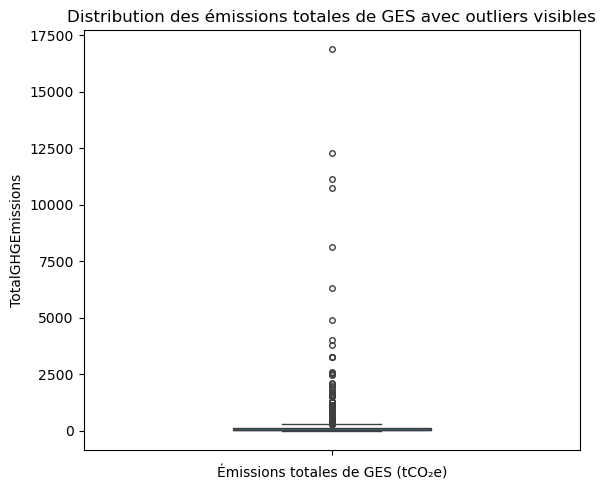

In [80]:
plt.figure(figsize=(6,5))
sns.boxplot(y=building_consumption["TotalGHGEmissions"], width=0.4, fliersize=4)
plt.xlabel("Émissions totales de GES (tCO₂e)")
plt.title("Distribution des émissions totales de GES avec outliers visibles")
plt.tight_layout()
plt.show()


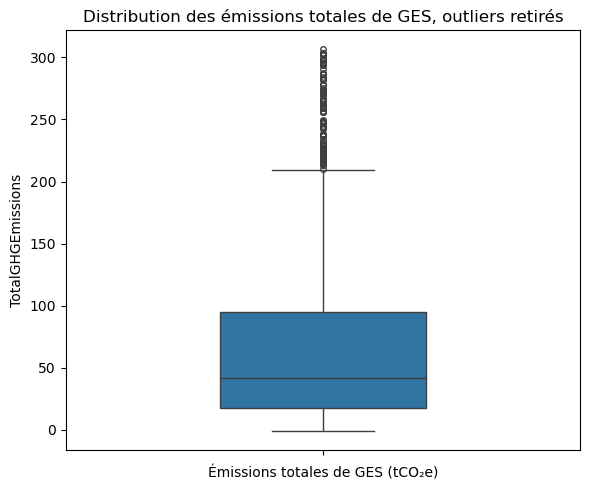

In [81]:
# Suppression des valeurs aberrantes sur TotalGHGEmissions par méthode IQR
q1 = building_consumption["TotalGHGEmissions"].quantile(0.25)
q3 = building_consumption["TotalGHGEmissions"].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
building_consumption = building_consumption[building_consumption["TotalGHGEmissions"].between(lb, ub)]

# Boxplot après nettoyage
plt.figure(figsize=(6,5))
sns.boxplot(y=building_consumption["TotalGHGEmissions"], width=0.4, fliersize=4)
plt.xlabel("Émissions totales de GES (tCO₂e)")
plt.title("Distribution des émissions totales de GES, outliers retirés")
plt.tight_layout()
plt.show()


* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).


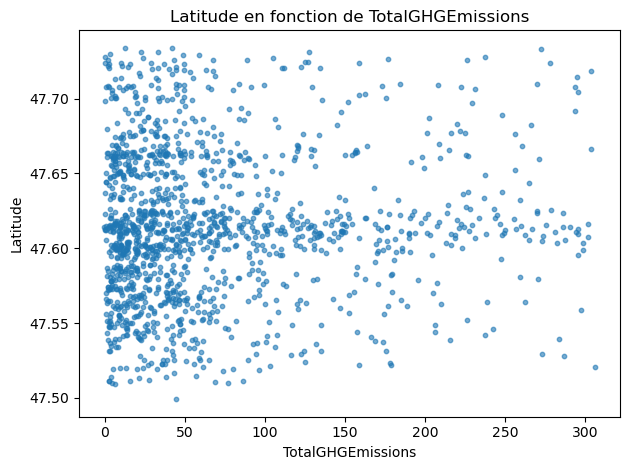

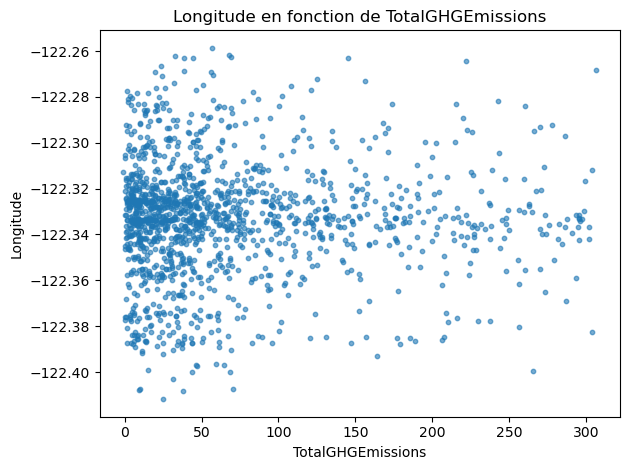

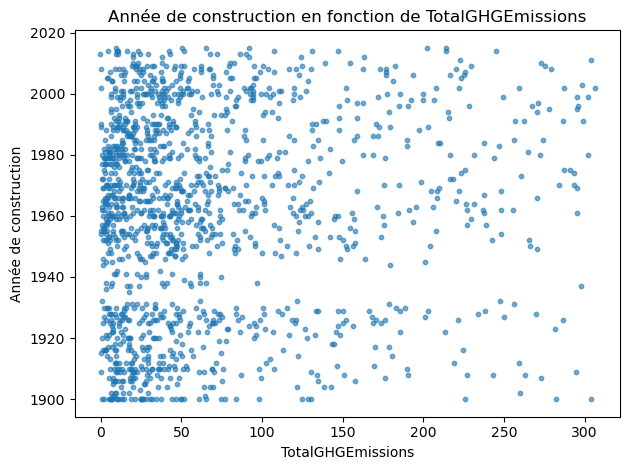

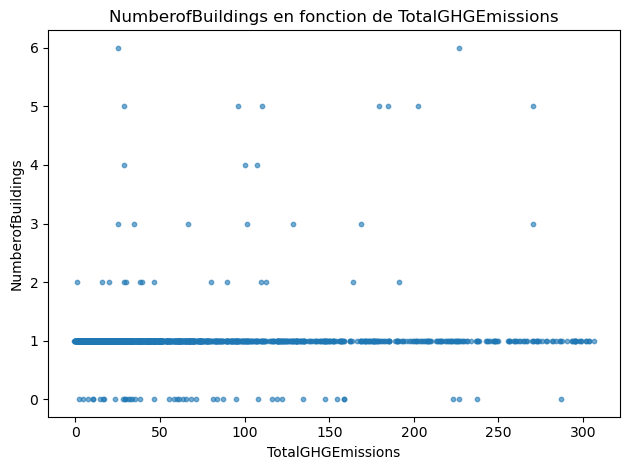

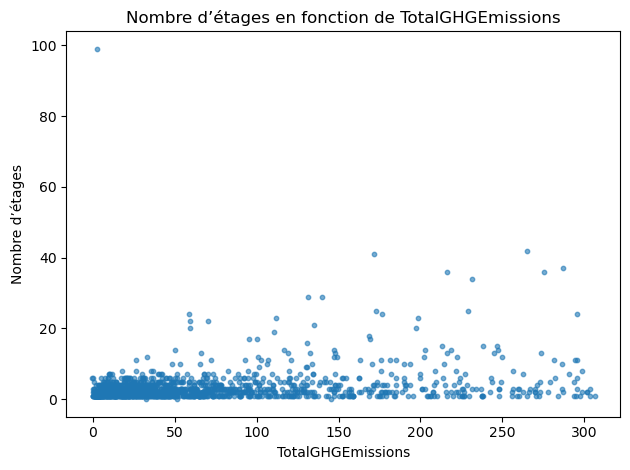

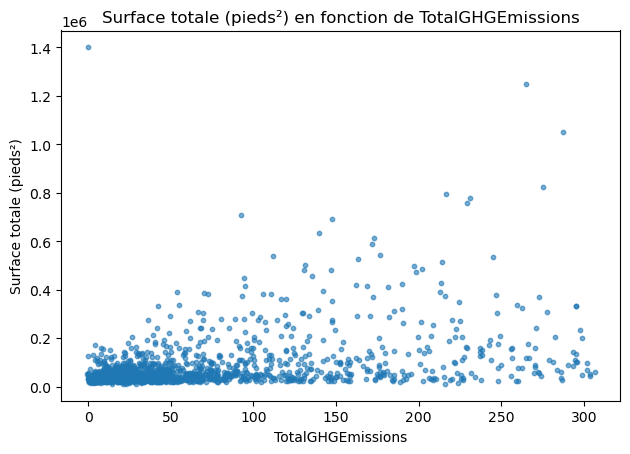

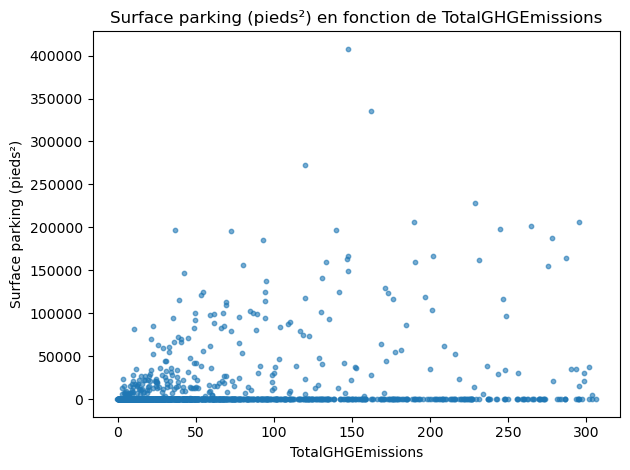

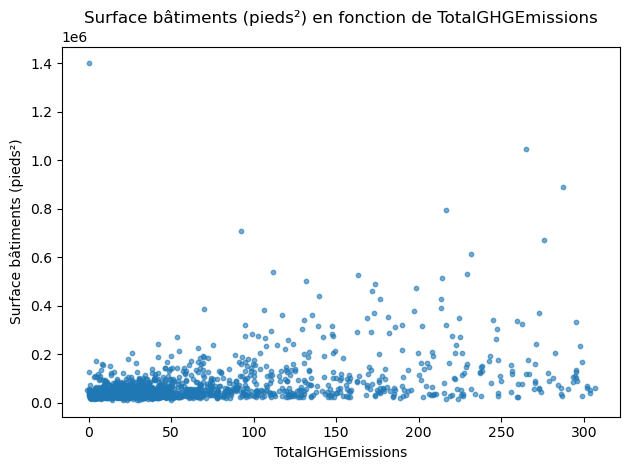

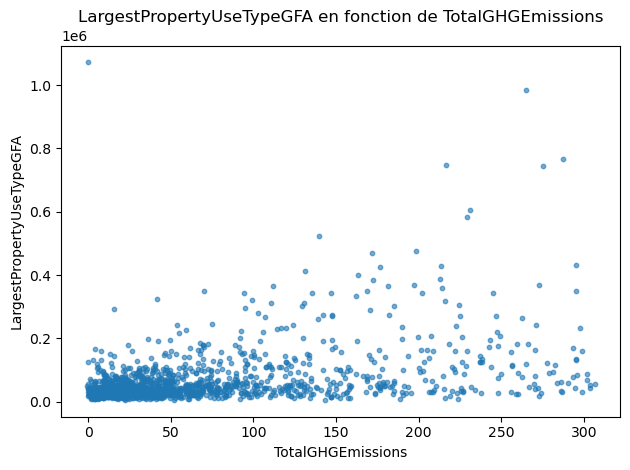

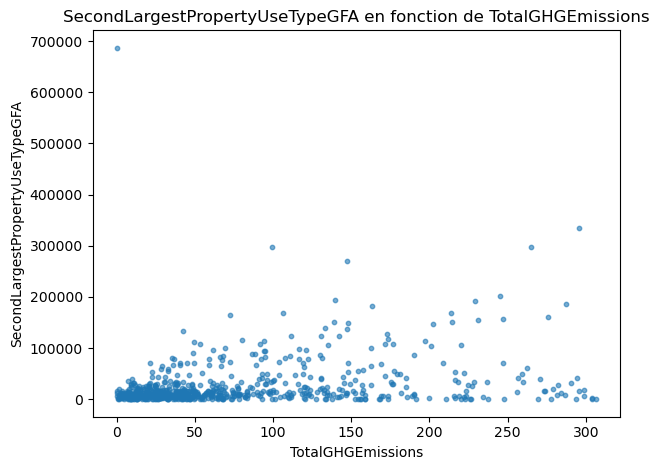

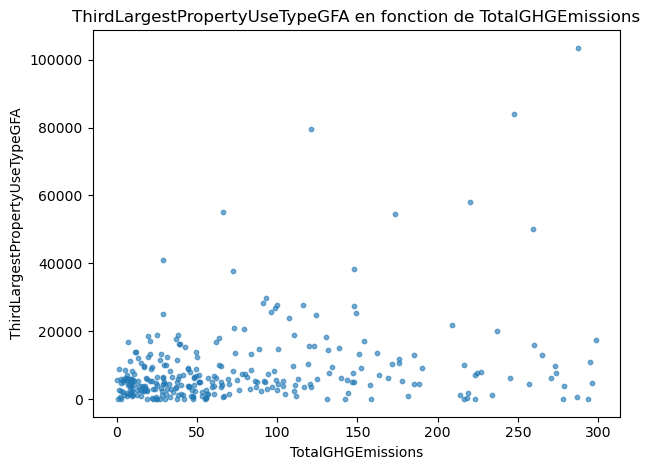

In [82]:
# Abscisse fixée
abscisse = "TotalGHGEmissions"

# Candidats automatiques en ordonnée, numériques, hors identifiants et abscisse
exclusions = {"OSEBuildingID", "ZipCode", "CouncilDistrictCode", abscisse}
candidats = [
    c for c in building_consumption.select_dtypes(include="number").columns
    if c not in exclusions and building_consumption[c].nunique(dropna=True) > 1
]

# Libellés en français
libelles = {
    "PropertyGFATotal": "Surface totale (pieds²)",
    "PropertyGFABuilding(s)": "Surface bâtiments (pieds²)",
    "PropertyGFAParking": "Surface parking (pieds²)",
    "NumberofFloors": "Nombre d’étages",
    "YearBuilt": "Année de construction",
    
}

# Tracé, une figure par candidat
assert abscisse in building_consumption.columns, f"Abscisse absente: {abscisse}"
for y in candidats:
    data_xy = building_consumption[[abscisse, y]].dropna()
    if data_xy.empty:
        continue
    plt.figure()
    plt.scatter(data_xy[abscisse], data_xy[y], s=10, alpha=0.6)
    plt.xlabel(libelles.get(abscisse, abscisse))
    plt.ylabel(libelles.get(y, y))
    plt.title(f"{libelles.get(y, y)} en fonction de {libelles.get(abscisse, abscisse)}")
    plt.tight_layout()
    plt.show()




In [83]:
print(building_consumption.columns.tolist())

['BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'TotalGHGEmissions']


*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target). 

In [90]:
cible = "TotalGHGEmissions"

colonnes_a_exclure = ['Address',cible]

X = building_consumption.drop(columns=[c for c in colonnes_a_exclure if c in building_consumption.columns])
y = building_consumption[cible]

display(X.head())


,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
0,NonResidential,Hotel,98101,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN
1,NonResidential,Hotel,98101,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0
3,NonResidential,Hotel,98101,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN
5,Nonresidential COS,Other,98101,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN
6,NonResidential,Hotel,98101,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN


* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

OneHotEncoder méthode

In [91]:
# Colonnes catégorielles explicites
cols_cat = [
    "BuildingType",
    "PrimaryPropertyType",
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "ThirdLargestPropertyUseType",
    
]

# On encode uniquement ces colonnes-là
X_OHE = pd.get_dummies(X, columns=cols_cat, drop_first=False)

print("Forme finale de X_OHE :", X_OHE.shape)
display(X_OHE.head())



Forme finale de X_OHE : (1451, 177)


,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Residence Hall/Dormitory,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School
0,98101,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,...,False,False,False,False,False,False,False,False,False,False
1,98101,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,...,False,False,True,False,False,False,False,False,False,False
3,98101,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,...,False,False,False,False,False,False,False,False,False,False
5,98101,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,...,False,False,False,False,False,False,False,False,False,False
6,98101,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,...,False,False,False,False,False,False,False,False,False,False


LabelEncoder

In [92]:
# Méthode 2, Label Encoding sur toutes les catégorielles
X_LE = X.copy()
for c in cols_cat:
    X_LE[c] = LabelEncoder().fit_transform(X_LE[c].astype(str))


## Comparaison de différents modèles supervisés

### A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [93]:
# --- Modèle 1 : DummyRegressor ---
# Copies dédiées
X_dummy = X_OHE.copy()
y_dummy = y.copy()

# Séparation apprentissage test
Xtr, Xte, ytr, yte = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

# Validation croisée sur le jeu d’apprentissage
scoring = {"r2":"r2", "mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error"}
cv_res = cross_validate(DummyRegressor(strategy="median"), Xtr, ytr, cv=5, scoring=scoring, return_train_score=False)

cv_r2   = cv_res["test_r2"].mean()
cv_mae  = -cv_res["test_mae"].mean()
cv_rmse = -cv_res["test_rmse"].mean()

# Entraînement sur tout le train
dum = DummyRegressor(strategy="median")
dum.fit(Xtr, ytr)

# Inférence
yp_tr = dum.predict(Xtr)
yp_te = dum.predict(Xte)

# Métriques apprentissage
r2_tr   = r2_score(ytr, yp_tr)
mae_tr  = mean_absolute_error(ytr, yp_tr)
rmse_tr = mean_squared_error(ytr, yp_tr, squared=False)

# Métriques test
r2_te   = r2_score(yte, yp_te)
mae_te  = mean_absolute_error(yte, yp_te)
rmse_te = mean_squared_error(yte, yp_te, squared=False)

print(f"Dummy, CV R2 moyen {cv_r2:.3f}, CV MAE moyen {cv_mae:.2f}, CV RMSE moyen {cv_rmse:.2f}")
print(f"Dummy, Train  R2 {r2_tr:.3f}, MAE {mae_tr:.2f}, RMSE {rmse_tr:.2f}")
print(f"Dummy, Test   R2 {r2_te:.3f}, MAE {mae_te:.2f}, RMSE {rmse_te:.2f}")


Dummy, CV R2 moyen -0.140, CV MAE moyen 50.79, CV RMSE moyen 77.08
Dummy, Train  R2 -0.137, MAE 50.76, RMSE 77.12
Dummy, Test   R2 -0.054, MAE 43.81, RMSE 63.56


c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [94]:
# --- Modèle 2 : Régression linéaire avec scaling ---

# Copies dédiées
X_lin = X_OHE.copy()
y_lin = y.copy()

# Séparation apprentissage et test
Xtr, Xte, ytr, yte = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Petit estimateur enveloppe, scaling puis modèle
class ScaleRegressor:
    def __init__(self, model):
        self.model = model
        self.scaler = StandardScaler()
        self.cols_ = None
    def fit(self, X_fit, y_fit):
        self.cols_ = X_fit.columns
        Xs = self.scaler.fit_transform(X_fit)
        self.model.fit(Xs, y_fit)
        return self
    def predict(self, X_new):
        Xs = self.scaler.transform(X_new[self.cols_])
        return self.model.predict(Xs)
    def get_params(self, deep=True):
        return {"model": self.model}
    def set_params(self, **params):
        for k,v in params.items(): setattr(self, k, v)
        return self

est = ScaleRegressor(LinearRegression())

# Validation croisée sur le jeu d’apprentissage
scoring = {"r2":"r2", "mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error"}
cv_res = cross_validate(est, Xtr, ytr, cv=5, scoring=scoring, return_train_score=False)

cv_r2   = cv_res["test_r2"].mean()
cv_mae  = -cv_res["test_mae"].mean()
cv_rmse = -cv_res["test_rmse"].mean()

# Entraînement complet
est.fit(Xtr, ytr)

# Inférence
yp_tr = est.predict(Xtr)
yp_te = est.predict(Xte)

# Métriques
r2_tr   = r2_score(ytr, yp_tr);  mae_tr  = mean_absolute_error(ytr, yp_tr);  rmse_tr = mean_squared_error(ytr, yp_tr, squared=False)
r2_te   = r2_score(yte, yp_te);  mae_te  = mean_absolute_error(yte, yp_te);  rmse_te = mean_squared_error(yte, yp_te, squared=False)

print(f"LIN, CV R2 moyen {cv_r2:.3f}, CV MAE moyen {cv_mae:.2f}, CV RMSE moyen {cv_rmse:.2f}")
print(f"LIN, Train  R2 {r2_tr:.3f}, MAE {mae_tr:.2f}, RMSE {rmse_tr:.2f}")
print(f"LIN, Test   R2 {r2_te:.3f}, MAE {mae_te:.2f}, RMSE {rmse_te:.2f}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ethan\AppData\Local\Temp\ipykernel_8624\190249955.py", line 18, in fit
    Xs = self.scaler.fit_transform(X_fit)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\base.py", line 1098, in fit_transform
    return self.fit(X, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'DOWNTOWN'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ethan\AppData\Local\Temp\ipykernel_8624\190249955.py", line 18, in fit
    Xs = self.scaler.fit_transform(X_fit)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\base.py", line 1098, in fit_transform
    return self.fit(X, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ethan\Anconda4\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'GREATER DUWAMISH'
